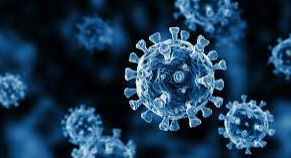

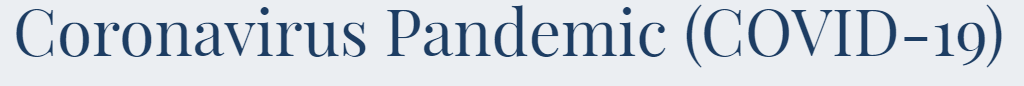

## **Table of Contents**


1. [**Problem Statement**](#Section1)<br>
2. [**Importing Packages**](#Section2)<br>
3. [**Loading Data**](#Section3)<br>
  3.1 [**Description of the dataset**](#Section31)<br>
  3.2 [**Pandas Profiling before Data Preprocessing**](#Section32)<br>
4. [**Data Processing**](#Section4)<br>
    4.1 [**Pandas Profiling after Data Preprocessing**](#Section41)<br>

5. [**Exploratory Data Analysis**](#Section5)<br>
  - 5.1 [**Analysis based on location**](#Section51)<br>
   - 5.1.1 [**What is the trend of total cases in India?**](#Section511)<br>
    - 5.1.2 [**What is the trend of total deaths in India?**](#Section512)<br>
    - 5.1.3 [**What is the trend of new cases in India?**](#Section513)<br>
    - 5.1.4 [**What is the trend of total no of cases in India during the last 30 days?**](#Section514)<br>
    - 5.1.5 [**What is the trend of total no of deaths in India during the last 30 days?**](#Section51)<br>
    - 5.1.6 [**What is the trend of total no of covid cases across India, UK and USA?**](#Section516)<br>
    - 5.1.7 [**Total cases vs Total deaths**](#Section517)<br>
    - 5.1.8 [**Which are the countries with the highest covid cases?**](#Section518)<br>
    - 5.1.9 [**Which are the countries with the highest deaths caused due to covid-19?**](#Section519)<br>
        
  - 5.2 [**Analysis based on age and death rate**](#Section52)<br>
  - 5.3 [**Analysis based on prevailing health conditions**](#Section53)<br>
       - 5.3.1 [**Does smoking increase chance of death in Covid-19 patients?**](#Section531)<br>
       - 5.3.2 [**Cardio vascular conditions on Covid-19 patients**](#Section532)<br>
       - 5.3.3 [**Diabetic conditions on Covid-19 patients**](#Section533)<br>
   - 5.4 [**Analysis based on availability of hospital beds**](#Section54)<br>
    
6. [**Conclusions**](#Section6)<br>
7. [**Actionable Insights**](#Section7)<br>
---

<a id=Section1></a>
# 1. Problem Statement
What are the pre-existing health and geographical factors that are responsible for the **increase in death rate in India** caused due to Covid-19 and **how can we mitigate it**?

<a id=Section2></a>
# 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\hp\anaconda3\lib\site-packages (4.14.3)


In [4]:
import plotly.graph_objs as go

<a id=Section3></a>
# 3. Loading Data

- 1. The Dataset "Covid-19 data for EDA" contains the records of the cases reported from **Jan 2020 till May 02 2021**

- 2. This dataset only includes data from countries like **India, USA, UK, UAE, Italy and China**

## Importing Dataset

In [5]:
#Importing the dataset Covid-19 data for EDA
df_covid_data = pd.read_excel('Covid-19 data for EDA.xlsx')
df_covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IND,Asia,India,2020-01-30,1,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
1,IND,Asia,India,2020-01-31,1,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2,IND,Asia,India,2020-02-01,1,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
3,IND,Asia,India,2020-02-02,2,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
4,IND,Asia,India,2020-02-03,3,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


<a id=Section31></a>
### 3.1 Description of the dataset

In [6]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               1384 non-null   object 
 1   continent                              1384 non-null   object 
 2   location                               1384 non-null   object 
 3   date                                   1384 non-null   object 
 4   total_cases                            1384 non-null   int64  
 5   new_cases                              1383 non-null   float64
 6   new_cases_smoothed                     1368 non-null   float64
 7   total_deaths                           1270 non-null   float64
 8   new_deaths                             1270 non-null   float64
 9   new_deaths_smoothed                    1368 non-null   float64
 10  total_cases_per_million                1384 non-null   float64
 11  new_

Info function gives us the following insights into the df_covid_data dataframe:

- There are a total of **1385 samples (rows)** and **59 columns** in the dataframe.

- There are **54 columns with a numeric datatype** and **5 columns with an object** datatype.

- There are missing values in the data

In [7]:
df_covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.384000e+03,1383.000000,1368.000000,1270.000000,1270.000000,1368.000000,1384.000000,1383.000000,1368.000000,1270.000000,1270.000000,1368.000000,1261.000000,685.000000,685.000000,690.000000,690.000000,0.0,0.0,100.0000,100.000000,1.207000e+03,1.216000e+03,1216.000000,1207.000000,1.210000e+03,1210.000000,1210.000000,1210.000000,3.370000e+02,3.360000e+02,2.930000e+02,3.210000e+02,3.580000e+02,337.000000,336.000000,293.000000,358.000000,1368.000000,1.384000e+03,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,4.590000e+02,1384.000000,1384.000000,1384.000000
mean,6.057325e+06,41057.836587,40560.700193,134060.067717,727.401575,666.141297,19655.183832,128.511116,128.937426,572.961680,2.979911,2.756158,1.146994,6979.910949,29.261012,31276.050725,170.614125,NaN,NaN,27150.2000,135.823080,6.956943e+05,1.005216e+08,381.572733,2.975559,6.947248e+05,2.996530,0.060807,45.513636,5.716765e+07,4.197224e+07,1.812450e+07,1.323923e+06,1.213682e+06,23.456795,18.039226,6.443038,4234.681564,65.707156,5.918295e+08,251.704148,35.777673,13.314746,8.561587,33583.896243,7.502023,185.017217,8.503020,13.693497,23.306503,5.955000e+01,1.950997,76.622919,0.834793
std,8.232671e+06,59787.426734,57122.612757,140711.254644,823.278741,755.297065,27048.739883,179.196030,177.124215,580.143626,4.021338,3.658605,0.436710,8109.576163,22.794657,32411.703481,130.225192,NaN,NaN,30210.0284,104.557732,5.359681e+05,1.086622e+08,477.649543,3.731356,5.060953e+05,3.651825,0.046421,76.800159,6.142609e+07,4.008366e+07,2.546159e+07,1.160041e+06,1.040624e+06,22.665326,16.568917,8.166552,2937.856394,21.073513,5.657358e+08,170.360264,5.436806,5.316046,3.803181,20031.202824,9.661358,69.554067,2.975536,8.318795,1.907659,4.623567e-13,1.005756,5.008678,0.133766
min,1.000000e+00,-4787.000000,0.000000,1.000000,-1.000000,0.000000,0.001000,-70.515000,0.000000,0.001000,-0.001000,0.000000,0.500000,60.000000,0.884000,770.000000,11.343000,NaN,NaN,292.0000,4.301000,1.570000e+02,3.460000e+02,0.001000,0.000000,1.121000e+03,0.001000,0.002000,3.300000,0.000000e+00,0.000000e+00,7.668000e+03,5.671000e+03,5.790900e+04,0.000000,0.000000,0.000000,81.000000,0.000000,6.788600e+07,35.608000,28.200000,5.989000,3.414000,6426.674000,0.200000,122.137000,4.280000,1.900000,20.600000,5.955000e+01,0.530000,69.660000,0.645000
25%,2.791080e+05,2735.500000,2839.357250,40703.500000,113.000000,72.000250,1559.141250,11.985500,12.400250,91.480750,0.280750,0.185000,0.910000,614.000000,9.045000,5989.250000,79.451750,NaN,NaN,3728.7500,54.926500,2.078510e+05,1.072401e+07,40.575250,0.625000,2.015110e+05,0.639500,0.028000,12.625000,1.236663e+07,1.140045e+07,1.481754e+06,3.953830e+05,3.602808e+05,3.680000,3.230000,0.720000,1547.500000,63.430000,6.788600e+07,35.608000,28.200000,5.989000,3.414000,6426.674000,0.200000,122.137000,4.280000,1.900000,20.600000,5.95

- ```describe``` function gives us the following insights into the data:
  
  - The max value of **new_cases** is 401993 and is an outlier because it is far away from the mean.

  - **new_deaths** is **positive (right) skewed** because the mean of **new_deaths lies to the right of the median (50%)** in the distribution plot. 
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some many other columns.
  - **positive_rate** column is almost normally distributed because the mean is 0.06 which is very close to the median 0.05

<a id=Section32></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [23]:
# Installing pandas profiling

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\hp\anaconda3\lib\site-packages (3.0.0)


In [25]:
import pandas_profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(df_covid_data, title = "Covid-19 data Profiling before Data Preprocessing", explorative = True)
#profile.to_widgets()
profile.to_file("Covid-19 data profiling before Data Preprocessing.html")

Summarize dataset:   0%|          | 0/72 [00:01<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 59
- Number of observations: 1384
- Missing cells: 20734 (25.4%)


__Variables types__: 
- Numeric = 37
- Categorical = 20
- Unsuported = 2

<br>

- **iso_code** is categorical and has no missing value. There are 3 iso codes : IND, USA and GBR


- **Continent** has **3 distinct values which are Asia, North America and Europe**.


- **Location** has 3 distinct values **USA, IND and GBR**.

- **date** is highly cardinal and has datatype of type object.

- **Total_cases** is right skewed and has a maximum value of 32421641 with 1302 distinct values and no missing values

- **new_cases** has 1 missing value and 1 negative value. It has 69 zeroes and is also positively skewed data.

- **new_cases_smoothed** has 16 missing values and is right skewed.

- **total_deaths** has a 114 missing values and is highly cardinal (97.9%).

- **new_deaths** has 114 missing values with 1 negative value.

- **new_deaths_smoothed** has 16 missing values and is right skewed.


- **total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million** are the variables which are highly correlated with their equivalents without per million. 

- **icu_patients** has 50.5% of missing data and is also highly cardinal (distinct values 92%)
  
  - **icu_patients_per_million** is highly correlated with **icu_patients** and is right skewed like **icu_patients**
  
- **hosp_patients** has 50.1% missing data and is right skewed.
 
  - **hosp_patients_per_million** is highly correlated with **hosp_patients**
  
- **weekly_icu_admissions** and **weekly_icu_admissions_per_million** have 100% missing values.
 
- **weekly_hosp_admissions** is an highly cardinal (distinct = 100%) and has 92.8% missing data.

- **Category** has data divided into **14** distinct values.
  
- **new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_million** are highly cardinal data with positive skewness
 			
- **positive_rate** has 174 missing values and is right skewed
  
- **total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations etc** are right skewed with a few missing values
 
- **population** is a categorical column with 3 distinct values. One for each country.
- **population_density** is a categorical column with 3 distinct values. One for each country.
- **median_age** is a categorical column with 3 distinct ages
- **aged_65_older** is a categorical column with 3 distinct ages 
- **aged_70_older** is a categorical column with 3 distinct ages
- **gdp_per_capita, extreme_poverty, cardiovascular_death_rate, diabetic_prevalence, female_smoker, male_smoker, hospital_beds_per_thousand, life_expectancy, human_development_index** are categorical columns


<a id=Section4></a>
### 4. Data Processing

Dropping the irrelevant columns such as iso_code, continent, weekly_icu_admissions,weekly_icu_admissions_per_million,handwashing_facilities

In [8]:
df_covid_data.drop(['iso_code', 'continent', 'weekly_icu_admissions','weekly_icu_admissions_per_million','handwashing_facilities'], axis=1, inplace=True)

In [9]:
df_covid_data.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vac

In [10]:
#Converting data from type object to data-time
import pandas as pd
import datetime as dt
df_covid_data['date'] = pd.to_datetime(df_covid_data['date'])

In [11]:
df_covid_data.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,India,2020-01-30,1,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
1,India,2020-01-31,1,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2,India,2020-02-01,1,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
3,India,2020-02-02,2,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
4,India,2020-02-03,3,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645


In [13]:
median_new_cases = df_covid_data[~(df_covid_data['new_cases'] == 'NaN')]['new_cases'].median()

In [14]:
df_covid_data['new_cases'] = df_covid_data['new_cases'].fillna(median_new_cases)

In [15]:
df_covid_data['new_cases'].isnull().sum()

0

In [16]:
df_covid_data['total_deaths'].isnull().sum()

114

In [17]:
median_total_deaths = df_covid_data[~(df_covid_data['total_deaths'] == 'NaN')]['total_deaths'].median()

In [18]:
df_covid_data['total_deaths'] = df_covid_data['total_deaths'].fillna(median_total_deaths)

In [19]:
df_covid_data['total_deaths'].isnull().sum()

0

In [20]:
median_new_cases_smoothed = df_covid_data[~(df_covid_data['new_cases_smoothed'] == 'NaN')]['new_cases_smoothed'].median()

In [21]:
df_covid_data['new_cases_smoothed'] = df_covid_data['new_cases_smoothed'].fillna(median_new_cases_smoothed)

In [22]:
median_new_deaths = df_covid_data[~(df_covid_data['new_deaths'] == 'NaN')]['new_deaths'].median()

In [23]:
df_covid_data['new_deaths'] = df_covid_data['new_deaths'].fillna(median_new_deaths)

In [24]:
median_new_deaths_smoothed = df_covid_data[~(df_covid_data['new_deaths_smoothed'] == 'NaN')]['new_deaths_smoothed'].median()

In [25]:
df_covid_data['new_deaths_smoothed'] = df_covid_data['new_deaths_smoothed'].fillna(median_new_deaths_smoothed)

In [26]:
df_covid_data['new_cases'] = df_covid_data['new_cases'].apply(np.floor).astype(int)
df_covid_data['new_cases_smoothed'] = df_covid_data['new_cases_smoothed'].apply(np.floor).astype(int)
df_covid_data['total_deaths'] = df_covid_data['total_deaths'].apply(np.floor).astype(int)
df_covid_data['new_deaths'] = df_covid_data['new_deaths'].apply(np.floor).astype(int)
df_covid_data['new_deaths_smoothed'] = df_covid_data['new_deaths_smoothed'].apply(np.floor).astype(int)

In [27]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location                               1384 non-null   object        
 1   date                                   1384 non-null   datetime64[ns]
 2   total_cases                            1384 non-null   int64         
 3   new_cases                              1384 non-null   int32         
 4   new_cases_smoothed                     1384 non-null   int32         
 5   total_deaths                           1384 non-null   int32         
 6   new_deaths                             1384 non-null   int32         
 7   new_deaths_smoothed                    1384 non-null   int32         
 8   total_cases_per_million                1384 non-null   float64       
 9   new_cases_per_million                  1383 non-null   float64 

<a id=Section41></a>
### 4.1 Pandas Profiling after Data Preprocessing

In [28]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_covid_data, title = "Covid-19 data Profiling before Data Preprocessing", explorative = True)
profile.to_file("Covid-19 data profiling after Data Preprocessing.html")

Summarize dataset:   0%|          | 0/67 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id=Section5></a>
## 5. Exploratory Data Analysis

<a id=Section51></a>
## 5.1. Analysis based on location

<a id=Section511></a>
### 5.1.1 What is the trend of total cases in India?

In [30]:
#Filtering out the India cases into a separate dataframe
df_india_case = df_covid_data[df_covid_data['location']=='India']

In [31]:
#Setting date column as the index
df_india_case.set_index("date", inplace = True)

In [34]:
df_india_case.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-30,India,1,1,21274,106632,487,476,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2020-01-31,India,1,0,21274,106632,487,476,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2020-02-01,India,1,0,21274,106632,487,476,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2020-02-02,India,2,1,21274,106632,487,476,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2020-02-03,India,3,1,21274,106632,487,476,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.53,69.66,0.645


Text(0.5, 1.0, 'The total cases of covid-19 trend in India over time')

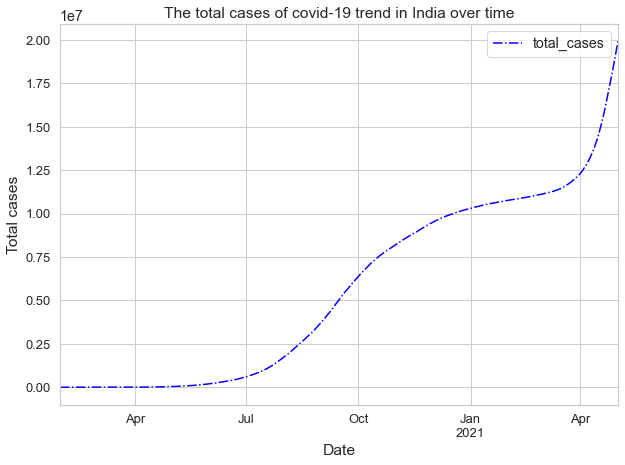

In [36]:
df_india_case[['total_cases']].plot(kind='line', figsize=(10,7), color='blue', fontsize=13, linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Total cases')
plt.title('The total cases of covid-19 trend in India over time')

- The total cases in covid rose exponentially after july 2020, however the there was a dip noticed after october.
- The cases seemed to normalise until march 2021 which
- The total number of cases shot up exponentially after april 2021 which is supposedly the second wave of covid-19

<a id=Section512></a>
### 5.1.2 What is the trend of total deaths in India?

Text(0.5, 1.0, 'The total deaths trend due to covid-19 in India over time')

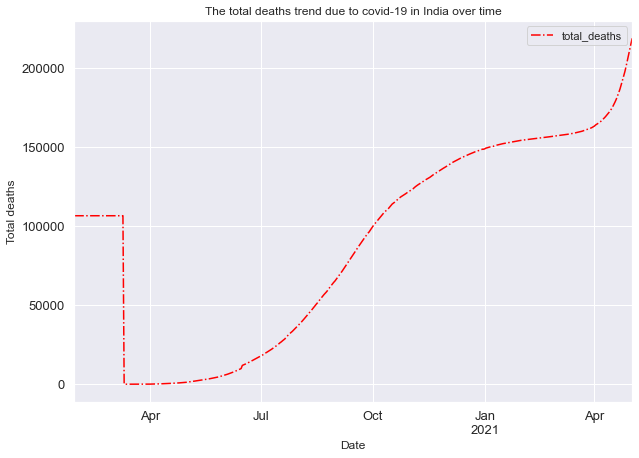

In [148]:
df_india_case[['total_deaths']].plot(kind='line', figsize=(10,7), color='red', fontsize=13, linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.title('The total deaths trend due to covid-19 in India over time')

- As noticed from the plot above, the flattened line until mid of march 2020 indicates no instances of death caused due to covid-19 in India.
- The no of total deaths began to rise exponentially since april 2020 until october 2020 where we can witness a dip in the total no of deaths in india.
- The total number of deaths in india began to shoot up exponentially after april 2021 which is supposedly the second wave of covid-19

<a id=Section513></a>
### 5.1.3 What is the trend of new cases in India?

Text(0.5, 1.0, 'The trend of new cases of covid 19 in India over time')

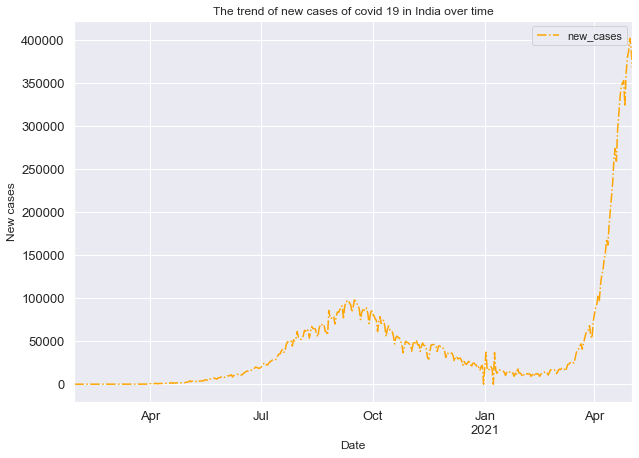

In [149]:
df_india_case[['new_cases']].plot(kind='line', figsize=(10,7), color='orange', fontsize=13, linestyle='-.')

plt.xlabel('Date')
plt.ylabel('New cases')
plt.title('The trend of new cases of covid 19 in India over time')

- As noticed from the plot above, the number of new cases rises after april and touches a peak at mid of aug 2020.
- The no of new cases takes a dip after aug 2020
- The cases seem to almost flatten from jan 2021 to feb 2021 until mid of march 2021.
- The total number of new cases in india began to shoot up exponentially after april 2021 which is supposedly the second wave of covid-19

<a id=Section514></a>
### 5.1.4 What is the trend of total no of cases in India during the last 30 days?

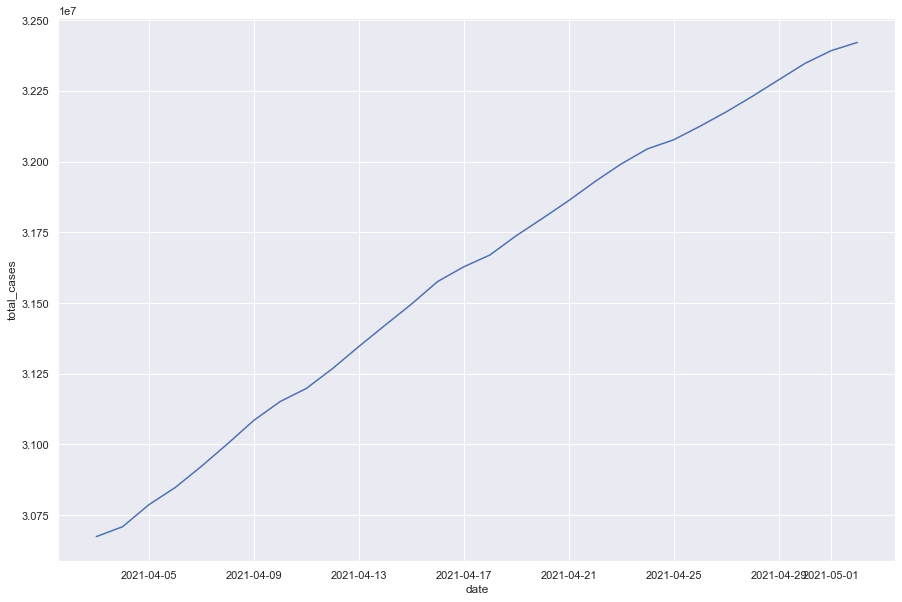

In [49]:
#Last 30 days data
df_ind_last_30_days = df_covid_data[df_covid_data['location']=='India']
df_ind_last_30_days = df_covid_data.tail(30)
#Total cases per day for last 30 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_cases', data = df_ind_last_30_days)
plt.show()

- It can be noticed that since the last 30 days, there has been a linear growth in the no of cases in India.
- However, you can see bumps of few dips here and there but doesn't significantly add much insights because the overall growth has been a linear trend.

<a id=Section515></a>
### 5.1.5 What is the trend of total no of deaths in India during the last 30 days?

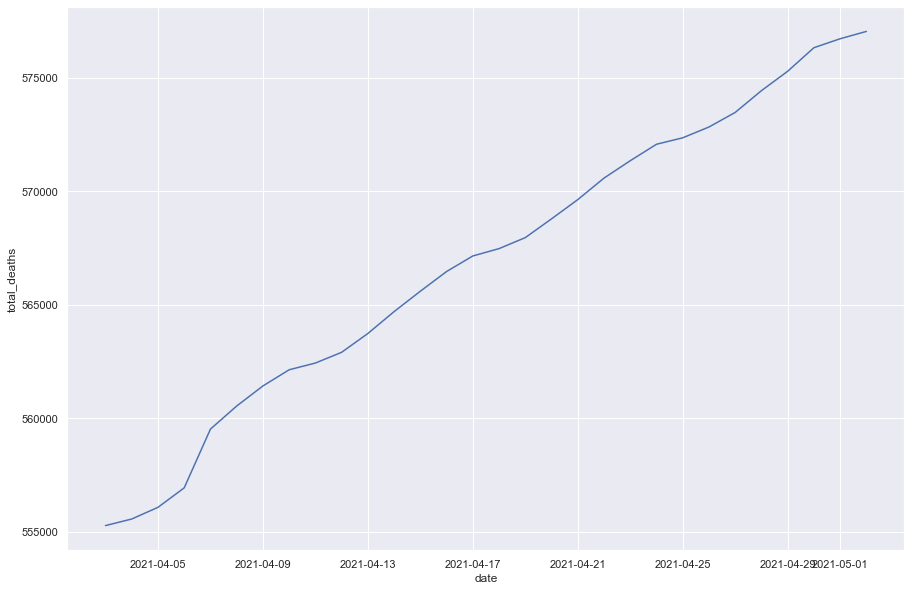

In [51]:
#Last 30 days data
#Total no of deaths per day for last 30 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_deaths', data = df_ind_last_30_days)
plt.show()

- It can be noticed that since the last 30 days, there has been a linear growth in the no of deaths in India.
- However, you can see bumps of few dips here and there but doesn't significantly add much insights because the overall growth in the deaths have a linear trend.

<a id=Section516></a>
### 5.1.6 What is the trend of total no of covid cases across India, UK and USA?

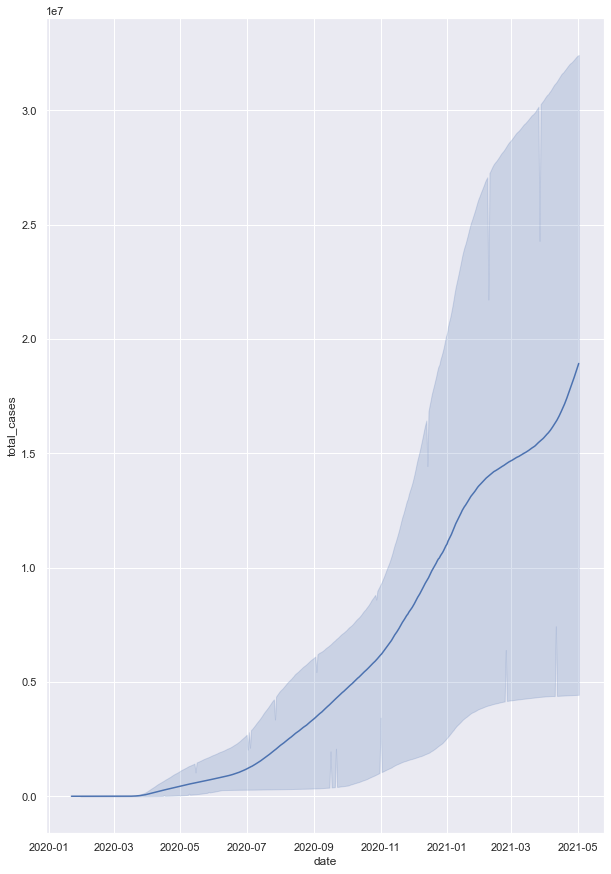

In [50]:
#Total cases per day across India, USA and UK
sns.set(rc={'figure.figsize':(10,15)})
sns.lineplot(x='date', y='total_cases', data = df_covid_data)
plt.show()

- There has been an exponential growth in the no of cases in India, US and UK.
- However, there's a dip in the cases that can be noticed after jan 2021 until march 2021.
- The curve seems to be growing after mid of march till may 2021.

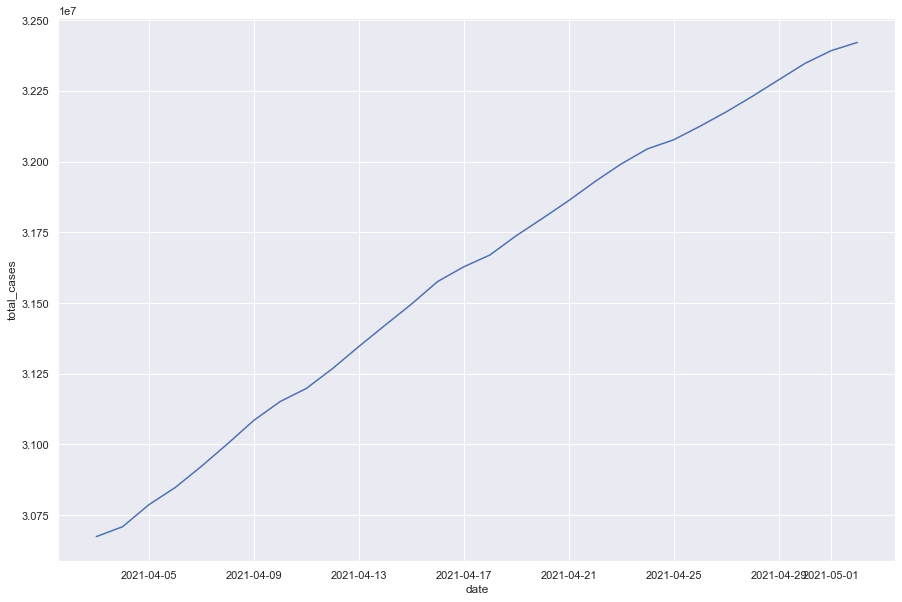

In [53]:
#Last 30 days data
last_30_days = df_covid_data.tail(30)
#Total cases per day for last 30 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_cases', data = last_30_days)
plt.show()

- There has been an exponential growth in the no of cases in India, US and UK.
- However, there are few insignificant dips.
- The overall growth seems to be linear for the last 30 days in these countries.

<a id=Section517></a>
### 5.1.7 Total cases vs Total deaths

Text(0.5, 1.0, 'total cases vs total deaths')

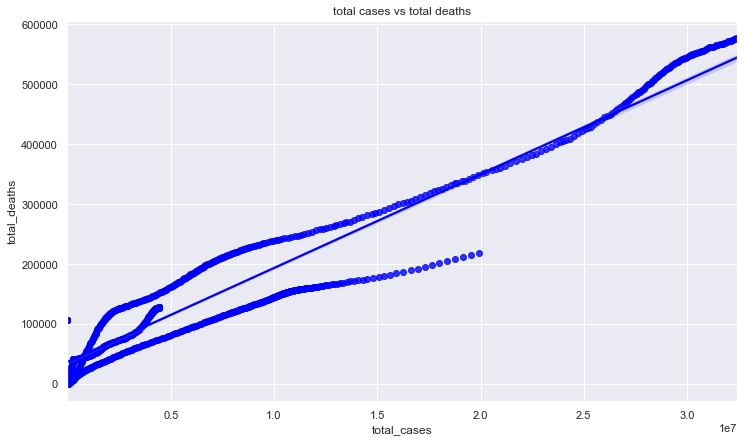

In [155]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_covid_data, x='total_cases', y='total_deaths', color='blue')

plt.title('total cases vs total deaths')

- The line of best fit indicates that with the rise of total cases, the total death is also increasing across countries US, UK and India
- It shows a strong positive correlation 

<a id=Section518></a>
### 5.1.8 Which are the countries with the highest covid cases?

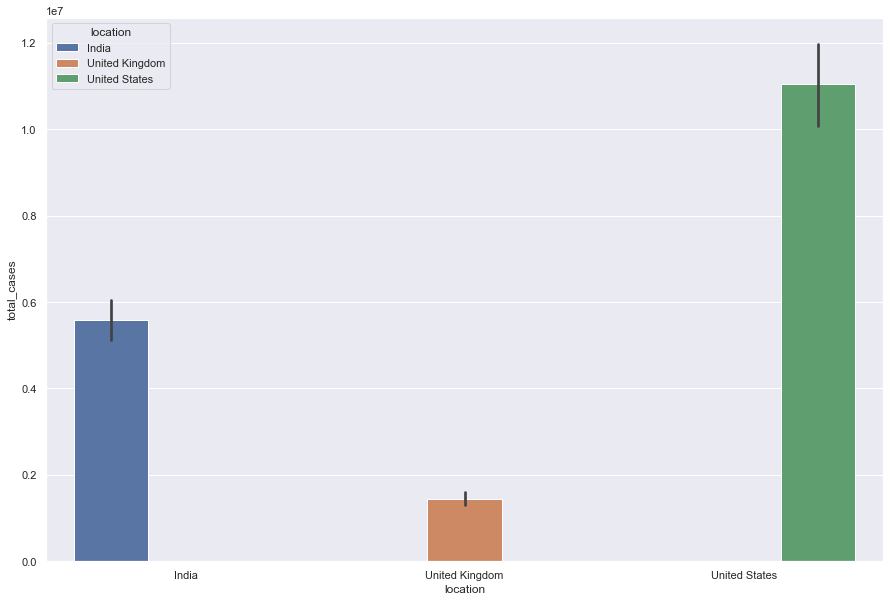

In [55]:
#Top countries with covid cases
#Plotting growth of cases across IND, US, UK
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='location', y='total_cases', data = df_covid_data, hue='location')
plt.show()

- United States has had the highest no of covid cases over time.
- India is the next highest after USA.

<a id=Section519></a>
### 5.1.9 Which are the countries with the highest deaths caused due to covid-19?

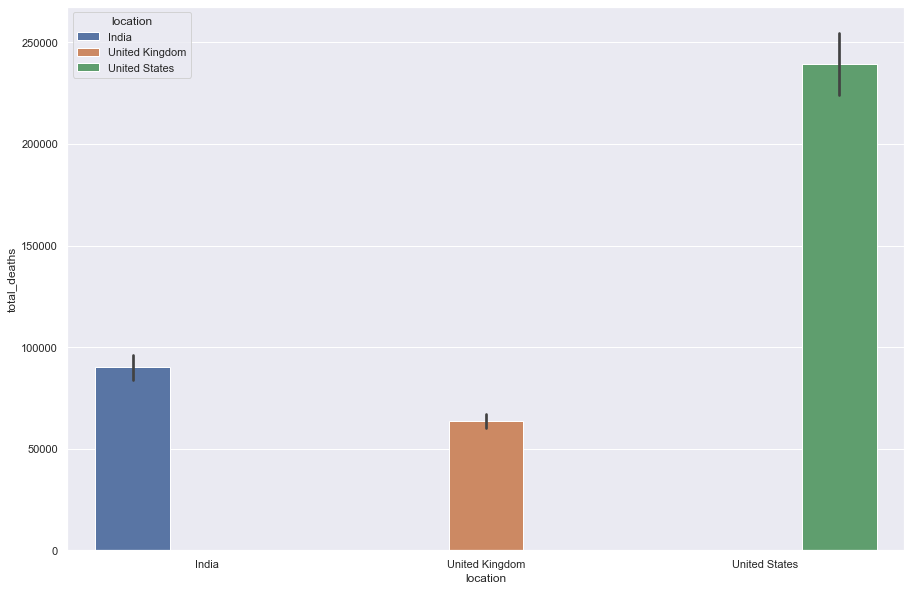

In [56]:
#Plotting growth of cases across IND, US, UK
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='location', y='total_deaths', data = df_covid_data, hue='location')
plt.show()

- United States has had the highest no of deaths caused due to covid-19 since its commencement.
- India is the next highest after USA.
- UK is significantly better interms of mortality rate compared to the other 2 countries.

<a id=Section52></a>
## 5.2. Analysis based on age and death rate

In [157]:
df_covid_data['aged_65_older'].value_counts()

15.413    467
5.989     459
18.517    458
Name: aged_65_older, dtype: int64

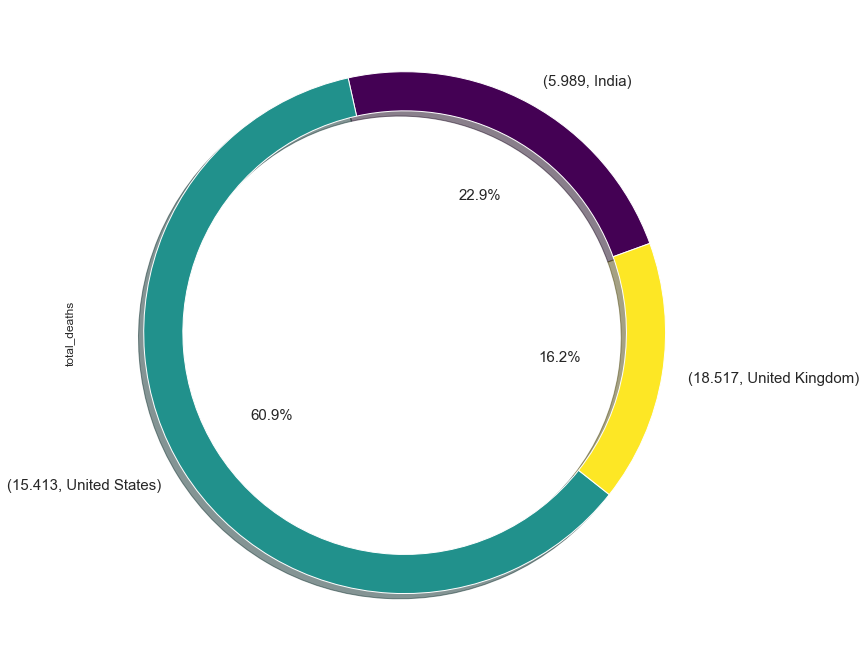

In [154]:
df_covid_data.groupby(['aged_65_older', 'location'])['total_deaths'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 figsize=(13, 12), fontsize=15,startangle=20, shadow=True, cmap='viridis')

- 15.413 is the share of population from the dataset for age group above 65 and belong to USA and the death rate is 60.9% 
- 18.517 is the share of population from the dataset for age group above 65 and belong to UK and the death rate is 16.2%
- 5.989 is the share of population from the dataset for age group above 65 and belong to India and the death rate is 22.9%
- It is noticed the share of India for aged_65_older as compared to is less than both US and UK, however the death rate is more than that of the UK and thus age group above 65 are more prone to fatality in India.


<a id=Section53></a>
## 5.3. Analysis based on prevailing health conditions

<a id=Section531></a>
### 5.3.1 Does smoking increase chance of death in Covid-19 patients?

In [147]:
df_covid_data['female_smokers'].value_counts()

19.1    467
1.9     459
20.0    458
Name: female_smokers, dtype: int64

Text(0.5, 1.0, 'Distribution of female smokers across the countries')

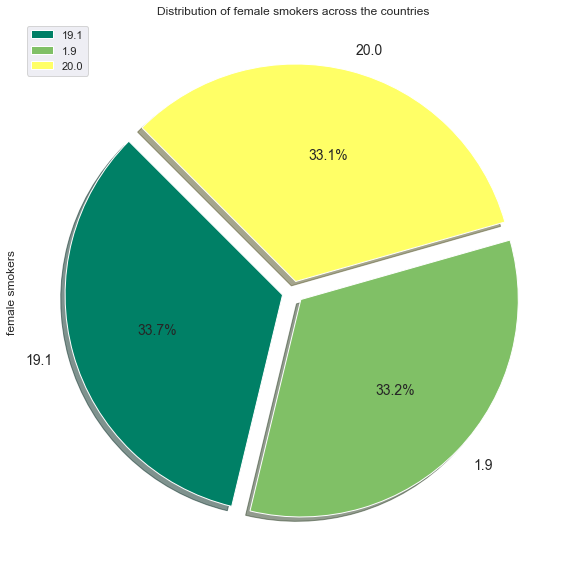

In [164]:
df_covid_data['female_smokers'].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('female smokers')
plt.title('Distribution of female smokers across the countries')

In [165]:
df_covid_data['male_smokers'].value_counts()

24.6    467
20.6    459
24.7    458
Name: male_smokers, dtype: int64

Text(0.5, 1.0, 'Distribution of male smokers across the countries')

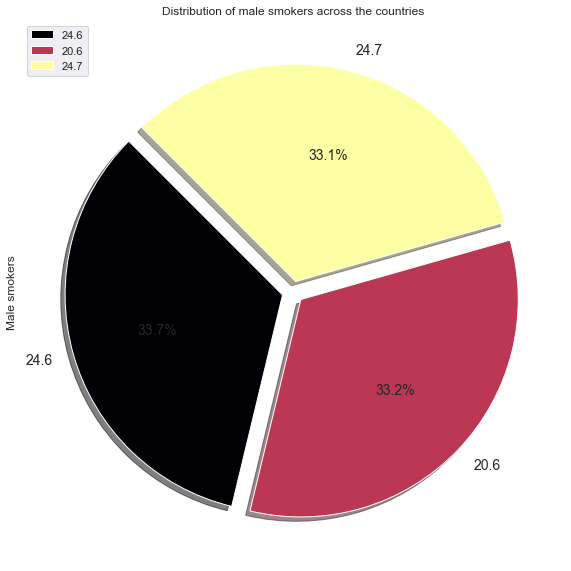

In [161]:
df_covid_data['male_smokers'].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='inferno')

plt.ylabel('Male smokers')
plt.title('Distribution of male smokers across the countries')

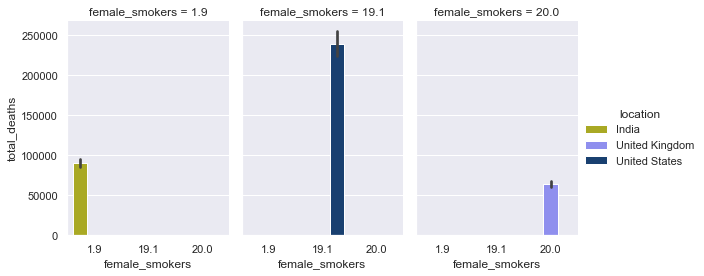

In [227]:
g = sns.catplot(x="female_smokers", y="total_deaths",
                hue="location", palette = "gist_stern_r",col="female_smokers",
                data=df_covid_data, kind="bar",
                height=4, aspect=.7);

- Share of female smokers is for India, USA and UK is 1.9, 19.1 and 20.0 respectively
- For a share of about 1.9 female smokers, almost 100000 total deaths have occured due to smoking in India.
- The death rate caused due to smoking in females is a lot larger in comparison to the death rate in US and UK with respect to their share of female smokers.

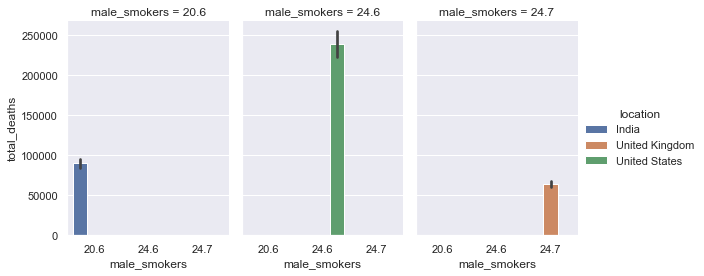

In [183]:
g = sns.catplot(x="male_smokers", y="total_deaths",
                hue="location", col="male_smokers",
                data=df_covid_data, kind="bar",
                height=4, aspect=.7);

- Share of female smokers is for India, USA and UK is 20.6, 24.6 and 24.7 respectively
- The maximum total amount of deaths caused in male covid smoking patients is about 240000 and is in the USA.
- For a share of about 20.6 male smokers, almost 100000 total deaths have occured due to smoking in India.
- The death rate caused due to smoking in males is greater in comparison to the death rate in the UK with respect to their share of male smokers.

<a id=Section532></a>
### 5.3.2 Cardio vascular conditions on Covid-19 patients

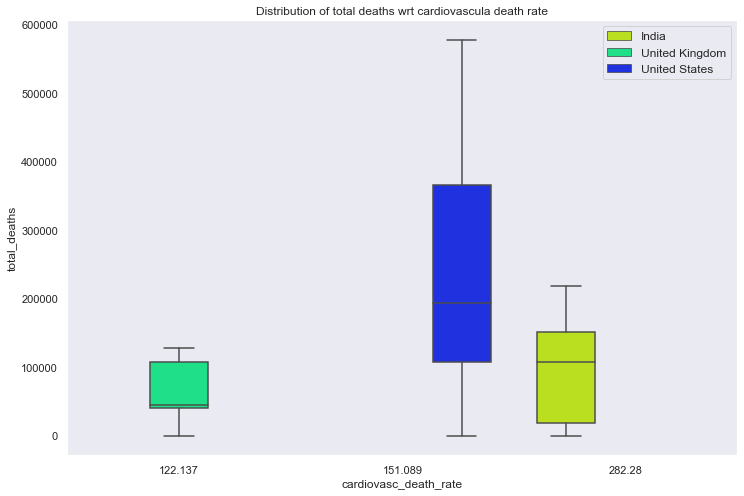

In [228]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_covid_data, x='cardiovasc_death_rate', y='total_deaths', hue='location', palette = 'gist_rainbow')

plt.xlabel('cardiovasc_death_rate')
plt.ylabel('total_deaths')
plt.title('Distribution of total deaths wrt cardiovascula death rate')
plt.grid(False)
plt.legend(fontsize=12)

- The cardiovascular death rate in India, UK and USA is 282.28, 122.137 and 151.089 respectively
- More than 50% of the cardio vascular death rate has seen about 100000 total deaths
- The highest death is in USA caused due to cardio vascular health condition

<a id=Section533></a>
### 5.3.3 Diabetic conditions on Covid-19 patients

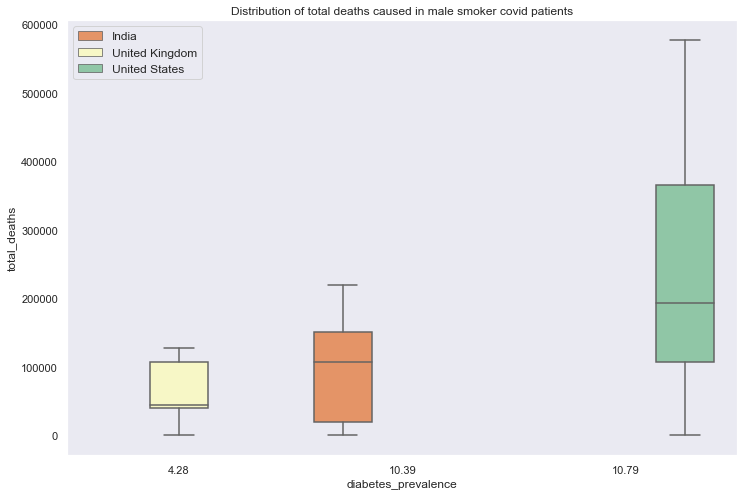

In [198]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_covid_data, x='diabetes_prevalence', y='total_deaths', hue='location', palette = 'Spectral')

plt.xlabel('diabetes_prevalence')
plt.ylabel('total_deaths')
plt.title('Distribution of total deaths caused in male smoker covid patients')
plt.grid(False)
plt.legend(fontsize=12)

- India reported 100000 total no of deaths for 50 percent of the covid patients with prevaling diabetes condition in India.
- The highest has been reported for the USA.

<a id=Section54></a>
## 5.4 Analysis based on availability of hospital beds

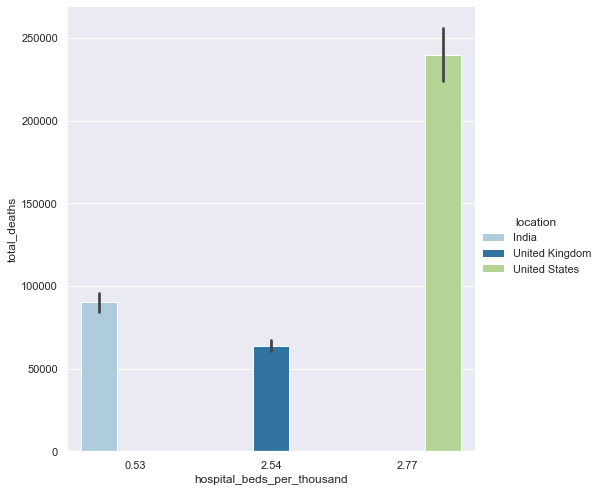

In [212]:
sns.catplot(x='hospital_beds_per_thousand', y='total_deaths', hue='location', data=df_covid_data, height=7, kind='bar', 
            palette='Paired')

- India has 0.53 hospital beds per thousands and has reported about 90000 total deaths.
- USA has the highest hospital beds per thousands (2.77) and has also reported the highest no od deaths (245000)

<a id=Section6></a>
## 6. Conclusions

- The curve for the total cases in india and the no of deaths was almost flattened in since mid of aug 2020 until mid of march 2021 during the first wave of corona virus.
- The rise in the cases after mid of march 2021 indicates that the second wave of covid-19 was responsible for the rise in cases and deaths.
- The total cases in India and the total deaths in india caused due to Covid 19 shows a strong positive correlation, indicating the rise in the no of deaths with the rise in no of cases for the latest data.
- There are several factors that has increased the mortality rate in India in the covid patients.
  - The covid patients with a history of smoking have been prone to fatality.
  - The females smokers were more affected than the male smokers.
  - The covid patients with prevailing diabetic conditions have succumbed to death as well
  - The cardiovascular conditions in the covid patients have increased the chances of death rate.
- There are other factors like hospital bed availabilty has also directly contributed to death in covid patients.

<a id=Section7></a>
## 7. Actionable Insights

- The rise in the curve caused due to Covid-19 in countries like India, US and UK can be flattened if we maintain social distancing.
- The chances of survival is higher for male and female with no history of smoking. 
- Increasing the availablity of beds per thousands can also help in reducing the mortality rate caused due to covid 19 which otherwise the patient is succumbed to virus due to lack of treatment in the hospital.
- The chances of survival is higher for people with no history of cardio vascular conditions.
- There are other factors too that may not directly contribute to the mortality rate in India but has a significant indirect impact. These are factors like GDP, population density, poverty etc. and we should work towards minimising these metrics.